In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\harsh\Downloads\Programs\lib\site-packages\sklearn\metrics\__init__.py)

In [17]:
df= pd.read_csv(r"C:\Users\DELL\OneDrive\Deskto\AAPL (1).csv")

In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-08,166.369995,167.809998,164.199997,164.869995,164.119019,60276900
1,2022-08-09,164.020004,165.820007,163.250000,164.919998,164.168777,63135500
2,2022-08-10,167.679993,169.339996,166.899994,169.240005,168.469131,70170500
3,2022-08-11,170.059998,170.990005,168.190002,168.490005,167.722534,57149200
4,2022-08-12,169.820007,172.169998,169.399994,172.100006,171.316086,68039400


In [19]:
df.shape

(251, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


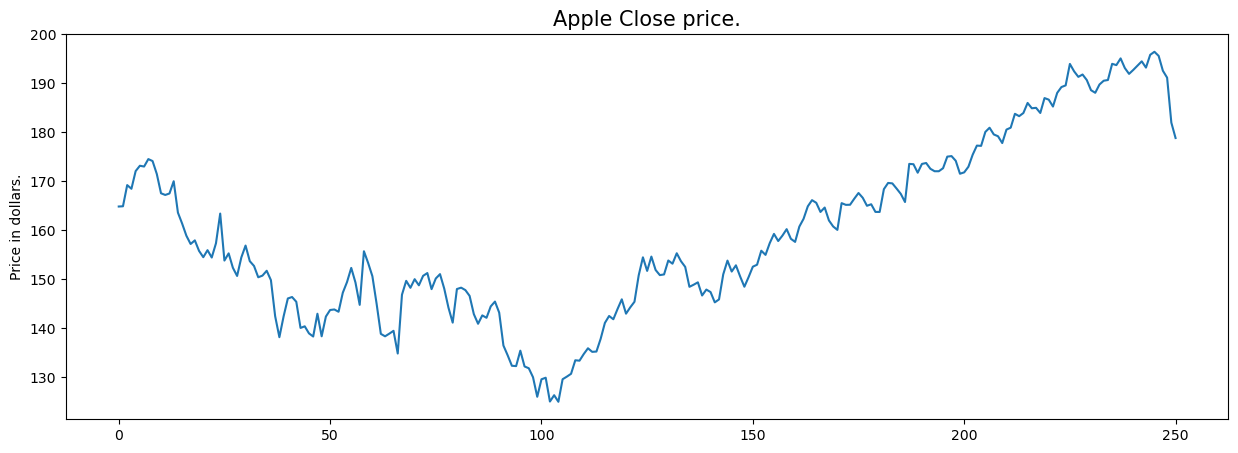

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Apple Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [22]:
df[df['Close'] == df['Adj Close']].shape


(59, 7)

In [23]:
df = df.drop(['Adj Close'], axis=1)


In [24]:
df.isnull().sum()


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

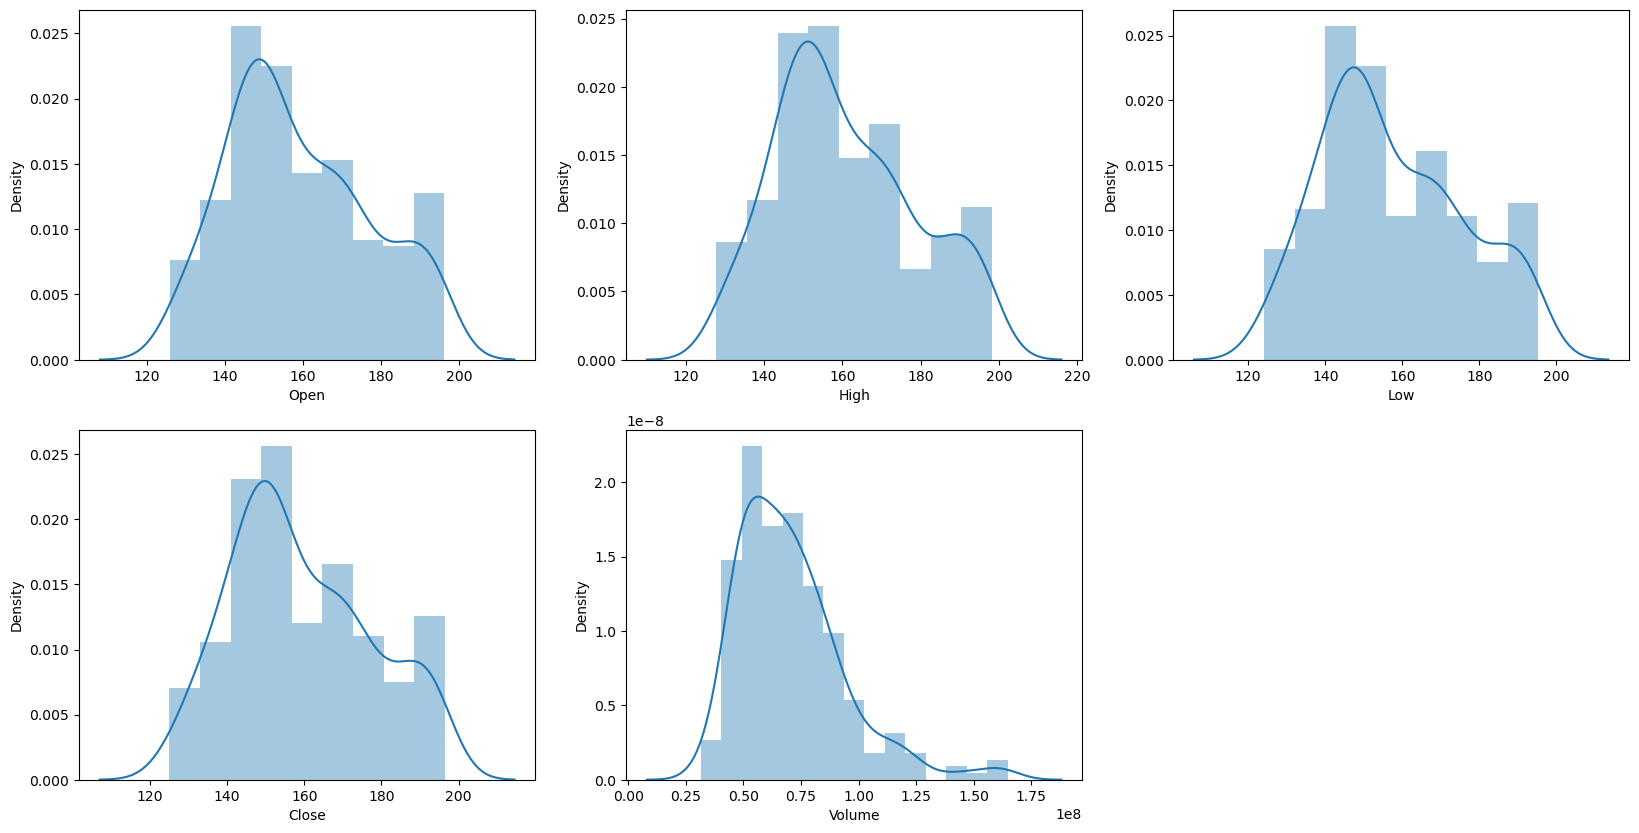

In [25]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    
plt.show()


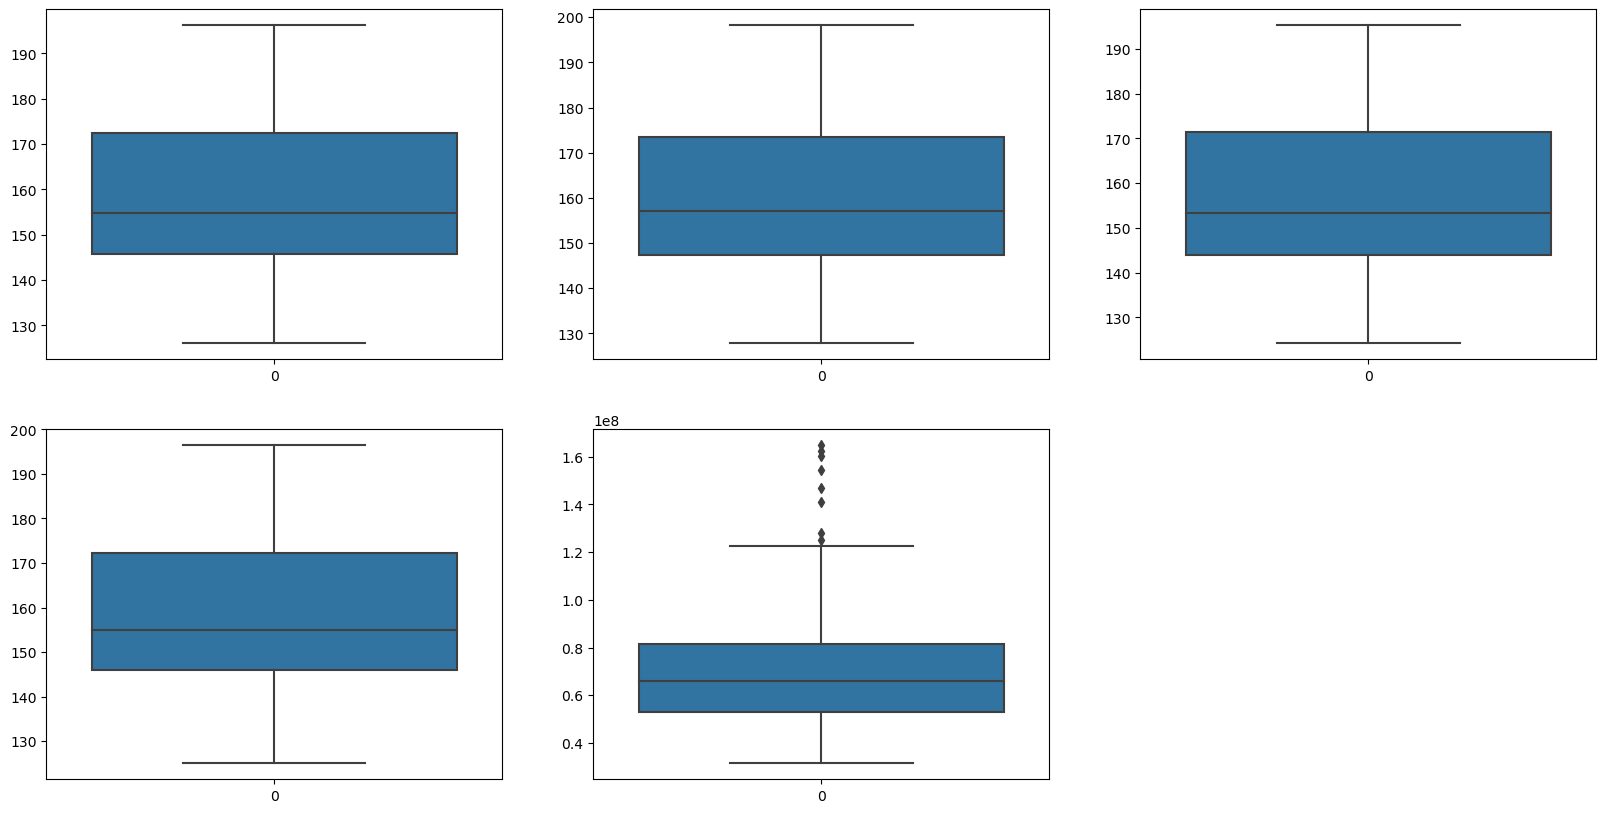

In [26]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])

plt.show()


In [29]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,2022-08-08,166.369995,167.809998,164.199997,164.869995,60276900,8,8,2022
1,2022-08-09,164.020004,165.820007,163.250000,164.919998,63135500,9,8,2022
2,2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500,10,8,2022
3,2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200,11,8,2022
4,2022-08-12,169.820007,172.169998,169.399994,172.100006,68039400,12,8,2022


In [30]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2022-08-08,166.369995,167.809998,164.199997,164.869995,60276900,8,8,2022,0
1,2022-08-09,164.020004,165.820007,163.250000,164.919998,63135500,9,8,2022,0
2,2022-08-10,167.679993,169.339996,166.899994,169.240005,70170500,10,8,2022,0
3,2022-08-11,170.059998,170.990005,168.190002,168.490005,57149200,11,8,2022,0
4,2022-08-12,169.820007,172.169998,169.399994,172.100006,68039400,12,8,2022,0


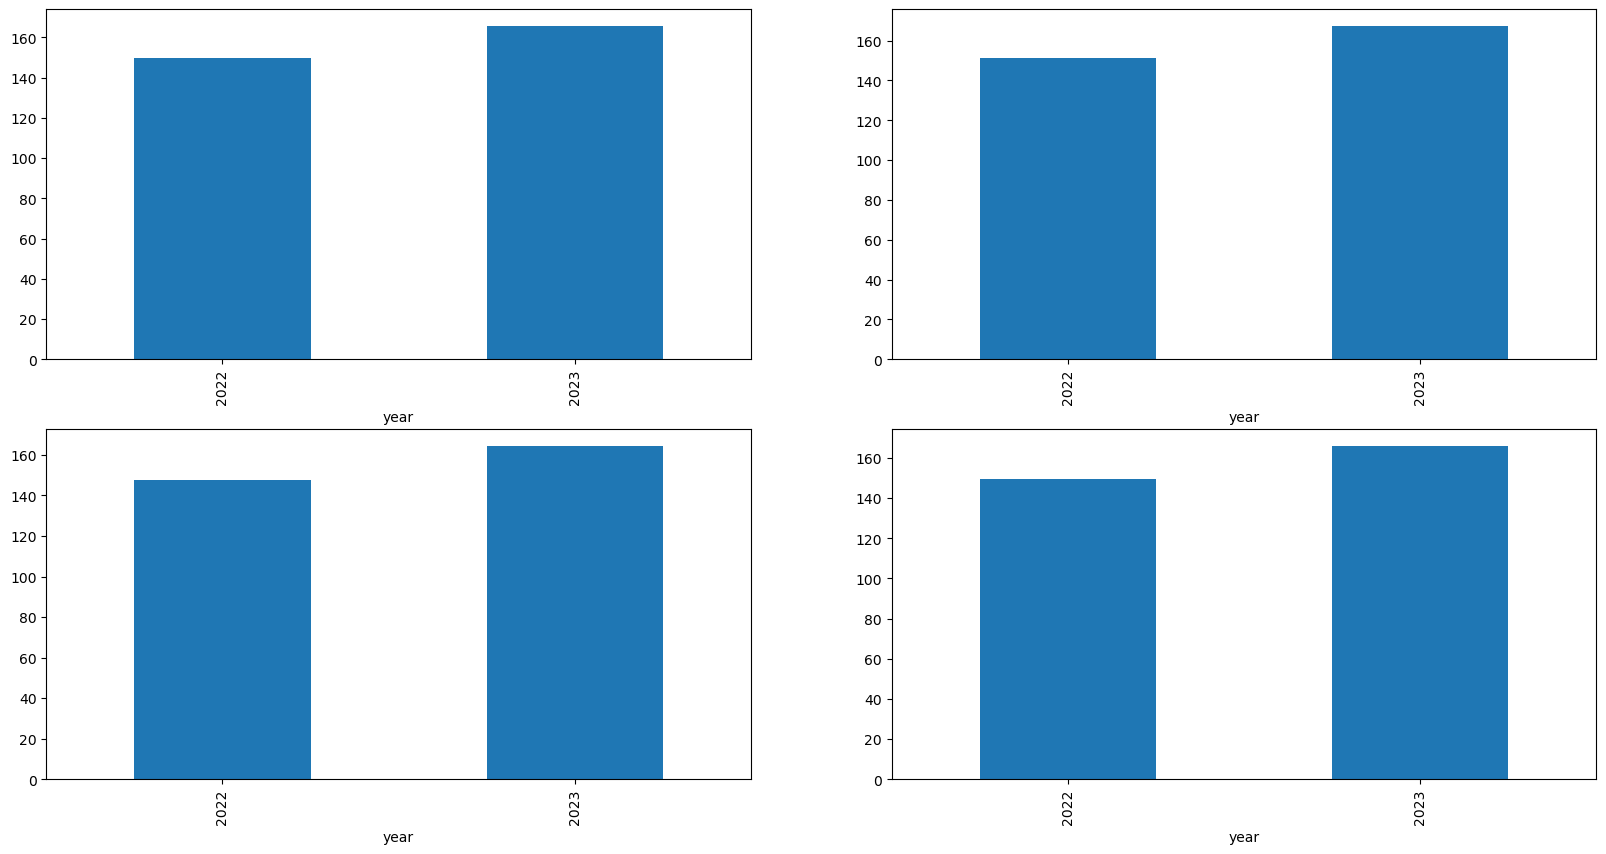

In [32]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [33]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,159.995395,161.763515,158.491273,160.203152,6.747060e+07,15.672727,6.115152,2022.636364
1,157.466861,159.250349,155.698372,157.472209,7.648630e+07,16.104651,7.395349,2022.511628


In [34]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


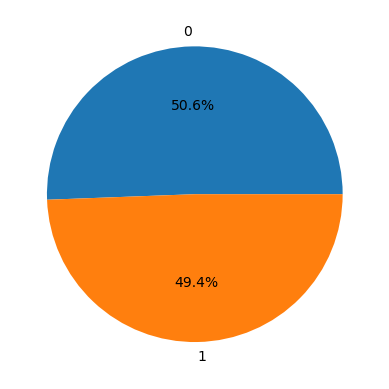

In [35]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


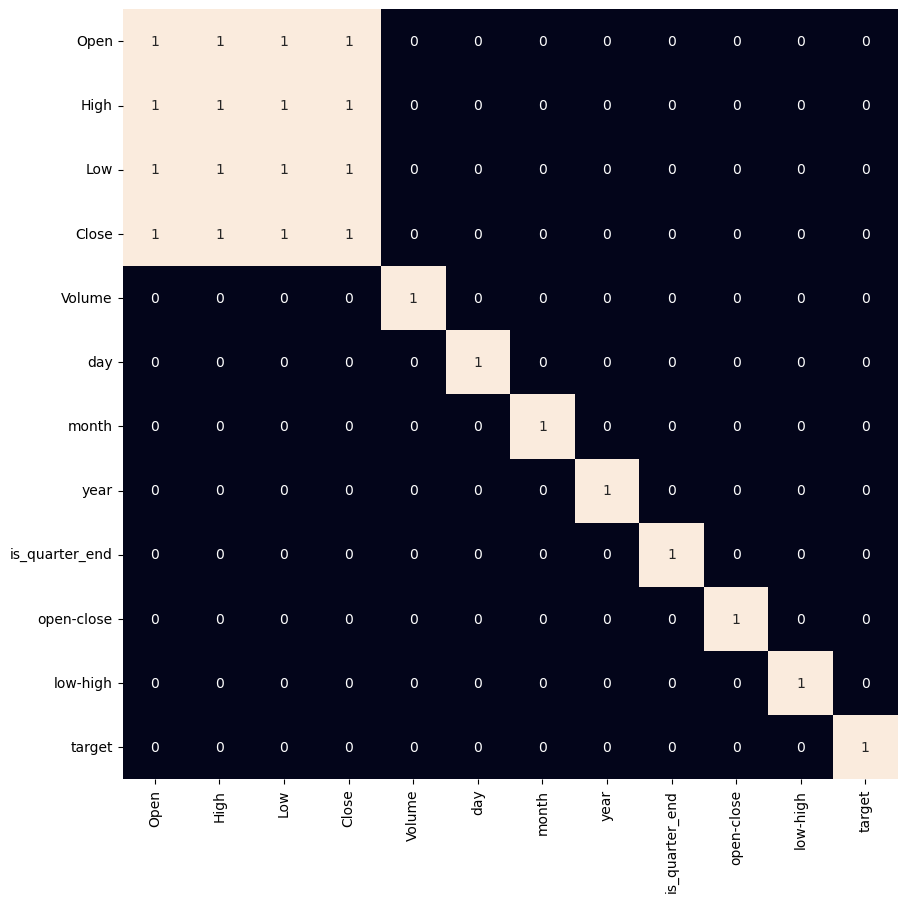

In [36]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [37]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(225, 3) (26, 3)


In [39]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.999841822208162
Validation Accuracy :  0.39583333333333337

